In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [41]:
import json

with open('training_data/final_stats.json') as f:
    history = json.load(f)


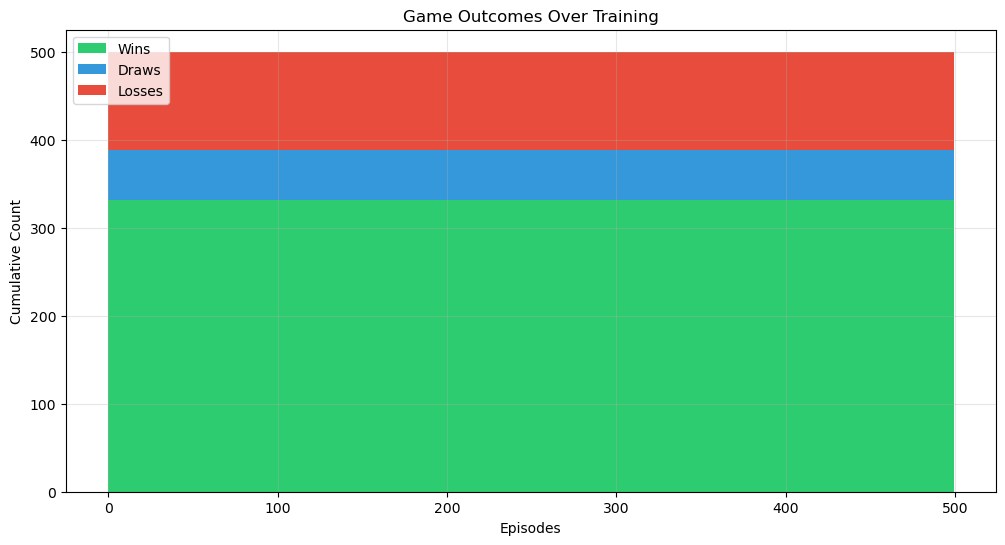

In [44]:
episodes = history['episodes']
wins = history['wins']
losses = history['losses']
draws = history['draws']

plt.figure(figsize=(12,6))
plt.stackplot(episodes, wins, draws, losses, 
              labels=['Wins', 'Draws', 'Losses'],
              colors=['#2ecc71', '#3498db', '#e74c3c'])
plt.xlabel('Episodes')
plt.ylabel('Cumulative Count')
plt.title('Game Outcomes Over Training')
plt.legend(loc='upper left')
plt.grid(alpha=0.3)
plt.show()

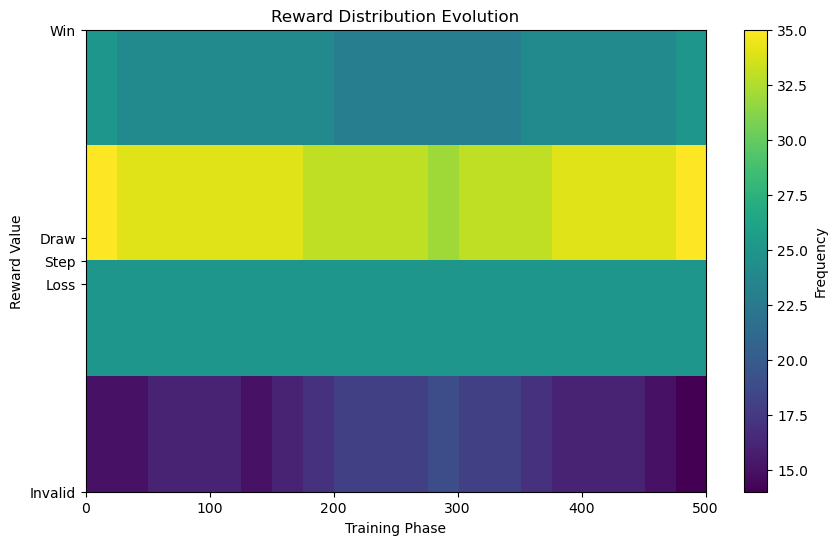

In [45]:
from scipy.ndimage import gaussian_filter

rewards = np.array(history['rewards'])
episode_chunks = np.array_split(rewards, 20)  # Split into 20 phases

# Prepare heatmap data
heatmap_data = []
for chunk in episode_chunks:
    hist, _ = np.histogram(chunk, bins=[-10, -1, 0, 1, 10])
    heatmap_data.append(hist)
heatmap_data = gaussian_filter(heatmap_data, sigma=1)

plt.figure(figsize=(10,6))
plt.imshow(heatmap_data.T, cmap='viridis', aspect='auto', 
           extent=[0, len(episodes), -10, 10])
plt.colorbar(label='Frequency')
plt.xlabel('Training Phase')
plt.ylabel('Reward Value')
plt.title('Reward Distribution Evolution')
plt.yticks([-10, -1, 0, 1, 10], ['Invalid', 'Loss', 'Step', 'Draw', 'Win'])
plt.show()

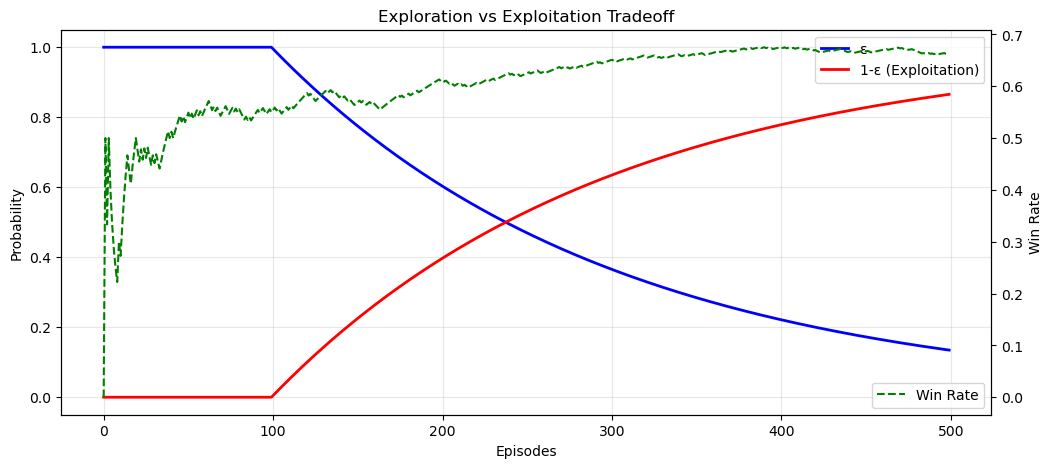

In [47]:
plt.figure(figsize=(12,5))
plt.plot(history['episodes'], history['epsilon'], 'b', lw=2, label='ε')
plt.plot(history['episodes'], 1-np.array(history['epsilon']), 'r', lw=2, label='1-ε (Exploitation)')
plt.xlabel('Episodes')
plt.ylabel('Probability')
plt.title('Exploration vs Exploitation Tradeoff')
plt.legend()
plt.grid(alpha=0.3)

# Add win rate on secondary axis
ax2 = plt.gca().twinx()
ax2.plot(history['episodes'], history['win_rate'], 'g--', label='Win Rate')
ax2.set_ylabel('Win Rate')
ax2.legend(loc='lower right')
plt.show()

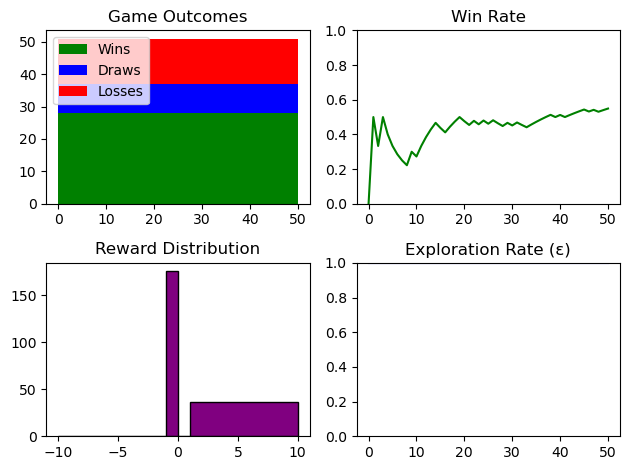

Current Episode: 50
Latest Win Rate: 0.55
Current ε: 1.000
Stopped visualization


In [52]:
import glob  # Added import
import json
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output

def live_training_visualization(history_path='training_data/stats_ep*.json'):
    plt.figure(figsize=(12,8))
    
    while True:
        try:
            # Get all matching stats files
            stats_files = sorted(glob.glob(history_path))  # Fixed: glob.glob()
            if not stats_files:
                print("Waiting for training data...")
                time.sleep(1)
                continue
                
            # Load the latest file
            with open(stats_files[-1]) as f:
                hist = json.load(f)
            
            clear_output(wait=True)
            
            # Plot 1: Outcomes
            plt.subplot(2,2,1)
            plt.stackplot(hist['episodes'], 
                         hist['wins'], hist['draws'], hist['losses'],
                         colors=['green','blue','red'],
                         labels=['Wins', 'Draws', 'Losses'])
            plt.title('Game Outcomes')
            plt.legend(loc='upper left')
            
            # Plot 2: Win Rate
            plt.subplot(2,2,2)
            plt.plot(hist['episodes'], hist['win_rate'], 'g-')
            plt.title('Win Rate')
            plt.ylim(0, 1)
            
            # Plot 3: Rewards
            plt.subplot(2,2,3)
            plt.hist(hist['rewards'], 
                     bins=[-10, -5, -1, 0, 1, 10],
                     color='purple',
                     edgecolor='black')
            plt.title('Reward Distribution')
            
            # Plot 4: Epsilon
            plt.subplot(2,2,4)
            plt.plot(hist['episodes'], hist['epsilon'], 'b')
            plt.title('Exploration Rate (ε)')
            plt.ylim(0, 1)
            
            plt.tight_layout()
            plt.show()
            
            # Display current training status
            last_episode = hist['episodes'][-1]
            print(f"Current Episode: {last_episode}")
            print(f"Latest Win Rate: {hist['win_rate'][-1]:.2f}")
            print(f"Current ε: {hist['epsilon'][-1]:.3f}")
            
            time.sleep(5)  # Refresh every 5 seconds
            
        except KeyboardInterrupt:
            print("Stopped visualization")
            break
        except Exception as e:
            print(f"Error: {e}")
            time.sleep(5)

# To run:
live_training_visualization()